In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

In [39]:
import matplotlib.pyplot as plt
df['label'].value_counts()


REAL    3171
FAKE    3164
Name: label, dtype: int64

In [40]:
df["text_length"]=df['text'].apply(len)

In [41]:
df.head()

,Unnamed: 0,title,text,label,text_length
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


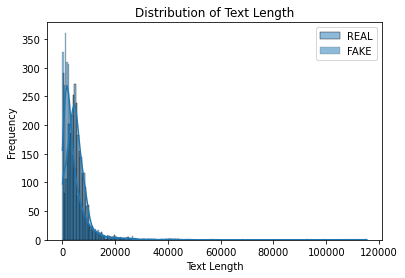

In [47]:
import seaborn as sns
sns.histplot(df[df['label']=="REAL"]["text_length"],kde=True,label="REAL")
sns.histplot(df[df['label']=="FAKE"]["text_length"],kde=True,label="FAKE")

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.legend()
plt.show()

In [51]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [53]:
nltk.download('punkt')
df['tokens']=df['text'].apply(nltk.word_tokenize)

<IPython.core.display.Javascript object>

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<IPython.core.display.Javascript object>

In [54]:
df.head()

,Unnamed: 0,title,text,label,text_length,tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,"[Daniel, Greenfield, ,, a, Shillman, Journalis..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,"[Google, Pinterest, Digg, Linkedin, Reddit, St..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,"[U.S., Secretary, of, State, John, F., Kerry, ..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,"[—, Kaydee, King, (, @, KaydeeKing, ), Novembe..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840,"[It, 's, primary, day, in, New, York, and, fro..."


In [55]:
from collections import Counter

In [56]:
word_counts=Counter()
for tokens in df['tokens']:
    word_counts.update(tokens)

In [58]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


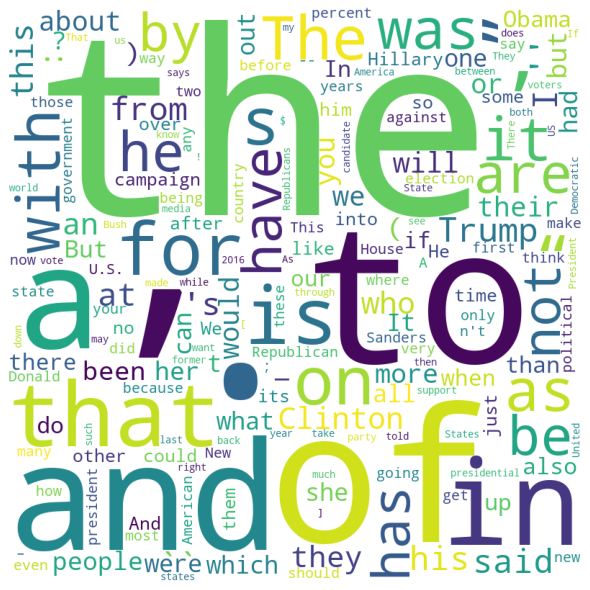

In [61]:
from wordcloud import WordCloud

wordcloud=WordCloud(width=800, height=800,background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

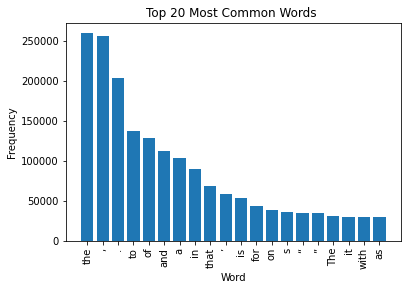

In [62]:
top_words=dict(word_counts.most_common(20))
plt.bar(top_words.keys(),top_words.values())
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words ")
plt.show()

In [63]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df=pd.read_csv("news.csv")
labels=df.label
x_train,x_test,y_train,y_test=train_test_split(df['text'],labels,test_size=0.3,random_state=7)
tfidf_vectorizer=TfidfVectorizer(stop_words="english",max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.53%


In [64]:
confusion_matrix(y_test,y_pred,labels=["REAL",'FAKE'])

array([[851,  76],
       [ 66, 908]], dtype=int64)